# Machine Learning Zoomcamp Homework Week 2

#### Por Felipe Cunha


In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np

### O Conjunto de dados utilizado foi o de preços de casas na california disponível no Kaggle.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv') # carregamento dos dados
df.head() # Visão geral dos dados

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis (EDA)
#### Primeiro uma visualização da distribuição de valores na variável alvo, no caso a "median_house_value"

<AxesSubplot:>

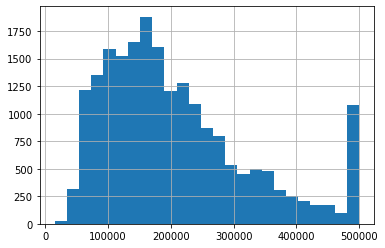

In [3]:
df['median_house_value'].hist(bins=25)

- It's look like we have a long tail in the right side of distribution as we can see in Histogram above;
- Percebe-se que há uma cauda longa a direita da distribuição

In [57]:
df['median_house_value'].describe() # breve descrição relativo ao preço das casas.

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

#### Só serão utilizados os dados em que os valores da variável "ocean_proximity" sejam iguais a "<1H OCEAN" ou "INLAND"

In [4]:
df_work = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
df_work.drop('ocean_proximity', axis=1, inplace=True)
df_work.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


### Questão 1
- Encontre uma variável que tenha valores faltando. Qual é?

In [6]:
df_work.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Total_bedrooms have missing values. 157 missing values. 
- A única variável que tem dados faltando é o total de quartos nas casas com 157 valores faltando.

### Questão 2 

- Qual a mediana (50% percentil) para a variável 'population'?

In [7]:
df_work['population'].describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

50% percentil (MEDIANA) = 1195

### Questão 3 

- Embaralhe o conjunto de dados (o filtrado que você criou acima), use a "semente" 42.
- Separe seus dados em conjuntos de treino, validação e teste na proporção de 60%/20%/20%.
- Aplique a transformação logarítmica na variável "median_house_value" usand a função np.log1p().

In [8]:
# Verificando o tamanho total do conjunto de dados e calculando o número de amostras que teremos em cada conjunto
n = len(df_work)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(f'n = {n}, n_val = {n_val}, n_test = {n_test}, n_train = {n_train}.')

n = 15687, n_val = 3137, n_test = 3137, n_train = 9413.


In [9]:
# Escolhendo o seed e embaralhando os dados em função dos índices criados 
idx = np.arange(n) # criando novos índices
np.random.seed(42) # escolhendo o seed (semente), garantia dos resultados serem iguais para o mesmo seed
np.random.shuffle(idx) # embaralhando os índices

In [10]:
# Criação dos conjuntos de dados de treino, validação e teste com as amostras embaralhadas pelo índice em função da semente escolhida. 
df_train = df_work.iloc[idx[:n_train]]
df_val = df_work.iloc[idx[n_train:n_train+n_val]]
df_test = df_work.iloc[idx[n_train+n_val:]]

len(df_train), len(df_test), len(df_val)

(9413, 3137, 3137)

In [11]:
df_train.head() # verificando os dados de treino

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [12]:
# resetando os valores do índice 

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [13]:
# retirando a variável target dos conjuntos
X_train = df_train.iloc[:,:8]
X_test = df_test.iloc[:,:8]
X_val = df_val.iloc[:,:8]

X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
9408,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
9409,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
9410,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
9411,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [14]:
# Aplicando o log na variável target
y_train = np.log1p(df_train['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)

y_train

array([11.16196275, 12.32163544, 12.4718963 , ..., 13.12236738,
       12.11888489, 12.52924613])

In [72]:
# substituindo dados faltantes por zero nos conjuntos

X_train_0 = X_train.fillna(value=0)
X_val_0 = X_val.fillna(value=0)
X_test_0 = X_test.fillna(value=0)

In [17]:
# Definindo uma função para modelo por regressão linear 

def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [80]:
w0, w = train_linear_regression(X_train_0, y_train) # treinando o modelo

In [81]:
y_pred = w0 + X_val_0.dot(w) # realizando as predições para o conjunto de validação

In [82]:
def rmse(y, y_pred):
  se = (y - y_pred) ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [83]:
round(rmse(y_val, y_pred),2)

0.33

In [85]:
X_train_mean = X_train.fillna(value=X_train['total_bedrooms'].mean())
X_val_mean = X_val.fillna(value=X_val['total_bedrooms'].mean())
X_test_mean = X_test.fillna(value=X_test['total_bedrooms'].mean())

In [86]:
w0, w = train_linear_regression(X_train_mean, y_train)
y_pred = w0 + X_val_mean.dot(w)

In [88]:
round(rmse(y_val, y_pred),2)

0.33

- Both era equally good! 0.33 vs 033
- Como pode-se observar, substituindo os valores que estão faltando por 0 ou pela média, resultaram no mesmo erro ao final da modelagem.

### Questão 4

- Agora iremos treinar um modelo de regressão linear com regularização.
- Para essa questão, substitua os valores faltantes por 0.
- Tente diferentes valores de r de acordo com a lista: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE para avaliar o modelo com o conjunto de validação.
- Arredonde os valores de RMSE para duas casas decimais.
- Qual valor de r nos dá o melhor RMSE?

In [27]:
def train_linear_regression_reg(X, y, r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])


  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [35]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

X_train_reg = prepare_X(X_train)
X_val_reg = prepare_X(X_val)

In [43]:
# Lista de valores de r
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

for r in r_values:
    w0, w = train_linear_regression_reg(X_train_reg, y_train, r)
    y_pred = w0 + X_val_reg.dot(w)
    rmse_value = rmse(y_val, y_pred)
    print(f'r={r}: RMSE={round(rmse_value,2)}')

r=0: RMSE=0.34
r=1e-06: RMSE=0.34
r=0.0001: RMSE=0.34
r=0.001: RMSE=0.34
r=0.01: RMSE=0.34
r=0.1: RMSE=0.34
r=1: RMSE=0.34
r=5: RMSE=0.35
r=10: RMSE=0.35


- O melhor RMSE foi para r=0, já que é preferível usar valores menores de r para quando tivermos valores iguais de RMSE.
- The best "r" is r = 0.

# Questão 5

- Usamos a semente (seed) 42 para dividir os dados. Vamos descobrir como a seleção da semente (seed) influencia a nossa pontuação.
- Teste diferentes valores de semente (seed): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- Para cada valor, faça a separação dos conjuntos em train/validation/test com proporções de 60%/20%/20%.
- Preencha os valores faltantes com 0 e treine um modelo sem regularização.
- Para cada semente, avalie o modelo no conjunto de dados de validação e colete os valores de RMSE.
- **Qual é o desvio padrão de todas as pontuações?** Para calcular o desvio padrão, use np.std.
- Arredonde o resultado para 3 dígitos decimais (round(std, 3))

In [50]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Função para preparar os dados
def prepare_data(df_work, seed_value):
    n = len(df_work)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(seed_value)
    np.random.shuffle(idx)

    df_train = df_work.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df_work.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df_work.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    X_train = df_train.iloc[:, :8]
    X_val = df_val.iloc[:, :8]
    X_test = df_test.iloc[:, :8]

    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    return X_train, y_train, X_val, y_val, X_test, y_test

# Valores de seed a serem testados
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_values = []  # Lista para armazenar os valores de RMSE

for seed_value in seed_values:
    X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(df_work, seed_value)
    
    X_train = prepare_X(X_train)
    X_val = prepare_X(X_val)

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    
    rmse_value = round(rmse(y_val, y_pred), 3)
    rmse_values.append(rmse_value)

    print(f'Seed {seed_value}: RMSE = {rmse_value}')    

std_rmse = np.std(rmse_values)    
print(f"Desvio Padrão dos Valores de RMSE: {std_rmse:.3f}")


Seed 0: RMSE = 0.338
Seed 1: RMSE = 0.338
Seed 2: RMSE = 0.338
Seed 3: RMSE = 0.332
Seed 4: RMSE = 0.339
Seed 5: RMSE = 0.343
Seed 6: RMSE = 0.339
Seed 7: RMSE = 0.347
Seed 8: RMSE = 0.351
Seed 9: RMSE = 0.334
Desvio Padrão dos Valores de RMSE: 0.005


# Questão 6

- Divida o conjunto de dados como anteriormente, use a semente 9.
- Combine conjuntos de dados de treinamento e validação.
- Preencha os valores ausentes com 0 e treine um modelo com r=0,001.
- **Qual é o RMSE no conjunto de dados de teste?**

In [56]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data(df_work, 9) # separando o conjunto de dados usando seed 9

X_combined = pd.concat([X_train, X_val], axis=0) # combinando o conjunto de treino com o de validação
y_combined = np.concatenate([y_train, y_val], axis=0) # combinando os valores de y 

# substituindo valores nulos por zeros nos conjuntos de dados:

X_combined_0 = prepare_X(X_combined)
X_test_0 = prepare_X(X_test)

train_linear_regression_reg(X_combined_0, y_combined) # treinando o modelo

y_pred = w0 + X_test_0.dot(w)
rmse_value = rmse(y_test, y_pred)
print(f'RMSE={round(rmse_value,2)}')

RMSE=0.33


- RMSE calculado foi de 0.33.

# Conclusões / Conclusions

- Foi possível obter um modelo simples por regressão linear que prevê os valores das casas na california a partir de 8 variáveis. Esse modelo possui um erro médio nas previões de 0.33 dólares o que pode ser considerado excelente.

- It was possible to obtain a simple linear regression model that predicts house values ​​in California based on 8 variables. This model has an average prediction error of 0.33 dollars, which can be considered excellent.